In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=5,random_state=6)

In [3]:
print(x.shape,y.shape)

(1000, 2) (1000,)


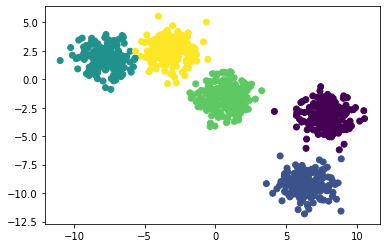

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [5]:
k=5
colour=['red','green','blue','yellow','orange']
clusters={}

for i in range(k):
    c=10*(2*np.random.random((x.shape[1],))-1)
    pt=[]
    cluster={ "color":colour[i],
               "point":pt,
               "center":c}
    clusters[i]=cluster

In [6]:
print(clusters)

{0: {'color': 'red', 'point': [], 'center': array([-3.14544753,  2.57537497])}, 1: {'color': 'green', 'point': [], 'center': array([ 0.1314994 , -3.00984895])}, 2: {'color': 'blue', 'point': [], 'center': array([-6.07825001,  4.04465679])}, 3: {'color': 'yellow', 'point': [], 'center': array([ 0.25999928, -1.48329404])}, 4: {'color': 'orange', 'point': [], 'center': array([1.65727275, 0.2668148 ])}}


In [7]:
def distance(v1,v2):
    return np.sqrt(sum((v1-v2)**2))

In [8]:
def assigntocluster(clusters):
    
    for i in range(x.shape[0]):
        dist=[]
        for kx in range(k):
            temp=distance(x[i],clusters[kx]['center'])
            dist.append(temp)
        
        #print(min(dist))
        t=np.argmin(dist)
        #print(t)
        clusters[t]['point'].append(x[i])

In [9]:
def updatecenters(clusters):
    
    for kx in range(k):
        allpts=np.array(clusters[kx]['point'])
        
        if allpts.shape[0]>0:
            pt=[]
            clusters[kx]['center']=np.mean(allpts,axis=0)
            clusters[kx]['point']=pt

In [10]:
def plotclusters(clusters):
    
    for kx in range(k):
        allpts=np.array(clusters[kx]['point'])
        if allpts.shape[0]>0:
            plt.scatter(allpts[:,0],allpts[:,1],color=clusters[kx]['color'])
        plt.scatter(clusters[kx]['center'][0],clusters[kx]['center'][1],marker='*',color='black')
    

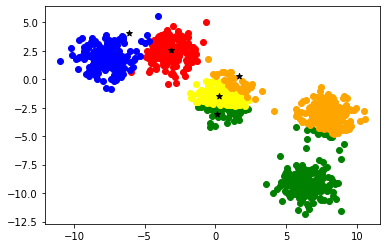

In [11]:
assigntocluster(clusters)
plotclusters(clusters)
updatecenters(clusters)

In [12]:
for i in range(100):
    assigntocluster(clusters)
    updatecenters(clusters)

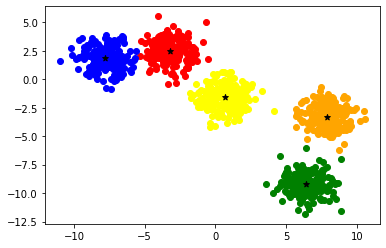

In [13]:
assigntocluster(clusters)
plotclusters(clusters)
updatecenters(clusters)